In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from datetime import datetime
import json
import re
import nltk
import spacy
from langdetect import detect
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from gensim import corpora, models, similarities, downloader
from nltk.tokenize import RegexpTokenizer
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')

In [48]:
df = pd.read_csv('hbs.csv')
#df = df.dropna(subset='title')
#df = df[df['title'].notna()]
df

,house_bill_number,title,significance,date_filed,principal_authors,date_read,primary_referral,mother_bill_status,status
0,HB00001,"AN ACT INSTITUTIONALIZING A NATIONAL VALUES, E...",NATIONAL,2019-07-01,"CAYETANO, ALAN PETER ""COMPAÑERO"" S.; MADRONA. ...",2019-07-23,BASIC EDUCATION AND CULTURE,Republic Act RA11476 enacted on 2020-06-25,Substituted by HB05829
1,HB00002,AN ACT CREATING THE DEPARTMENT OF OVERSEAS FIL...,NATIONAL,2019-07-01,"CAYETANO, ALAN PETER ""COMPAÑERO"" S.; CAYETANO,...",2019-07-23,GOVERNMENT REORGANIZATION,"Approved by the House on 2020-03-11, transmitt...",Substituted by HB05832
2,HB00003,AN ACT PROVIDING FOR A NATIONAL PROGRAM TO SUP...,NATIONAL,2019-07-01,"CAYETANO, ALAN PETER ""COMPAÑERO"" S.",2019-07-23,WELFARE OF CHILDREN,NaN,Transmitted to the Committee on Appropriations...
3,HB00004,AN ACT CREATING THE EMERGENCY RESPONSE DEPARTM...,NATIONAL,2019-07-01,"CAYETANO, ALAN PETER ""COMPAÑERO"" S.; DUTERTE, ...",2019-07-23,GOVERNMENT REORGANIZATION,"Approved by the House on 2020-09-22, transmitt...",Substituted by HB05989
4,HB00005,AN ACT INSTITUTIONALIZING MICROFINANCE PROGRAM...,NATIONAL,2019-07-01,"CAYETANO, ALAN PETER ""COMPAÑERO"" S.",2019-07-23,"MICRO, SMALL AND MEDIUM ENTERPRISE DEVELOPMENT",NaN,"Pending with the Committee on MICRO, SMALL AND..."
...,...,...,...,...,...,...,...,...,...
10091,HB10105,AN ACT CRIMINALIZING THE USE OF FAKE VACCINATI...,NATIONAL,2021-08-30,"SY-ALVARADO, ""KUYA"" JOSE ANTONIO R.",2021-09-01,JUSTICE,NaN,Pending with the Committee on JUSTICE since 20...
10092,HB10106,AN ACT DEFINING AND CRIMINALIZING VACCINE HOAR...,NATIONAL,2021-08-30,"VARGAS, ALFRED",2021-09-01,JUSTICE,NaN,Pending with the Committee on JUSTICE since 20...
10093,HB10107,AN ACT PROVIDING FOR THE PROMOTION AND DEVELOP...,NATIONAL,2021-08-30,"YAP, VICTOR A.; COJUANGCO, CARLOS O.; DE VENEC...",2021-08-31,RULES,NaN,Reported out 2021-08-30 (#01179);Submitted by ...
10094,HB10108,AN ACT ESTABLISHING A SPECIAL ECONOMIC ZONE IN...,LOCAL,2021-08-30,"BARONDA, JULIENNE ""JAM"" L.; GARIN, SHARON S.; ...",2021-08-31,RULES,NaN,Reported out 2021-08-30 (#01180);Submitted by ...


In [68]:
df = df[['house_bill_number', 'title', 'date_filed']].drop_duplicates(subset='title', keep='first')
df

,house_bill_number,title,date_filed
0,HB00001,"AN ACT INSTITUTIONALIZING A NATIONAL VALUES, E...",2019-07-01
1,HB00002,AN ACT CREATING THE DEPARTMENT OF OVERSEAS FIL...,2019-07-01
2,HB00003,AN ACT PROVIDING FOR A NATIONAL PROGRAM TO SUP...,2019-07-01
3,HB00004,AN ACT CREATING THE EMERGENCY RESPONSE DEPARTM...,2019-07-01
4,HB00005,AN ACT INSTITUTIONALIZING MICROFINANCE PROGRAM...,2019-07-01
...,...,...,...
10091,HB10105,AN ACT CRIMINALIZING THE USE OF FAKE VACCINATI...,2021-08-30
10092,HB10106,AN ACT DEFINING AND CRIMINALIZING VACCINE HOAR...,2021-08-30
10093,HB10107,AN ACT PROVIDING FOR THE PROMOTION AND DEVELOP...,2021-08-30
10094,HB10108,AN ACT ESTABLISHING A SPECIAL ECONOMIC ZONE IN...,2021-08-30


In [58]:
df[df['title'] == 'AN ACT INSTITUTING THE MAGNA CARTA OF DAY CARE WORKERS AND PROVIDING FUNDS THEREFOR']

,house_bill_number,title,significance,date_filed,principal_authors,date_read,primary_referral,mother_bill_status,status
178,HB00179,AN ACT INSTITUTING THE MAGNA CARTA OF DAY CARE...,NATIONAL,2019-07-01,"SUANSING, HORACIO JR. P.; SUANSING, ESTRELLITA...",2019-07-23,WELFARE OF CHILDREN,NaN,Transmitted to the Committee on Appropriations...
216,HB00217,AN ACT INSTITUTING THE MAGNA CARTA OF DAY CARE...,NATIONAL,2019-07-01,"PUNO, ROBERTO V.",2019-07-23,WELFARE OF CHILDREN,NaN,Transmitted to the Committee on Appropriations...
519,HB00520,AN ACT INSTITUTING THE MAGNA CARTA OF DAY CARE...,NATIONAL,2019-07-01,"AGLIPAY, MICHAEL EDGAR Y.",2019-07-23,WELFARE OF CHILDREN,NaN,Transmitted to the Committee on Appropriations...
686,HB00689,AN ACT INSTITUTING THE MAGNA CARTA OF DAY CARE...,NATIONAL,2019-07-01,"QUIMBO, STELLA LUZ A.",2019-07-23,WELFARE OF CHILDREN,NaN,Transmitted to the Committee on Appropriations...
1938,HB01945,AN ACT INSTITUTING THE MAGNA CARTA OF DAY CARE...,NATIONAL,2019-07-10,"FORTUN, LAWRENCE ""LAW"" H.",2019-07-24,WELFARE OF CHILDREN,NaN,Transmitted to the Committee on Appropriations...
2166,HB02173,AN ACT INSTITUTING THE MAGNA CARTA OF DAY CARE...,NATIONAL,2019-07-15,"HERRERA-DY, BERNADETTE ""BH""",2019-07-29,WELFARE OF CHILDREN,NaN,Transmitted to the Committee on Appropriations...
2825,HB02832,AN ACT INSTITUTING THE MAGNA CARTA OF DAY CARE...,NATIONAL,2019-07-25,"RODRIGUEZ, RUFUS B.",2019-07-31,WELFARE OF CHILDREN,NaN,Transmitted to the Committee on Appropriations...
2841,HB02848,AN ACT INSTITUTING THE MAGNA CARTA OF DAY CARE...,NATIONAL,2019-07-25,"YU, DIVINA GRACE C.",2019-07-31,WELFARE OF CHILDREN,NaN,Transmitted to the Committee on Appropriations...
3019,HB03027,AN ACT INSTITUTING THE MAGNA CARTA OF DAY CARE...,NATIONAL,2019-07-29,"PALMA, WILTER ""SHARKY"" II WEE",2019-08-05,WELFARE OF CHILDREN,NaN,Transmitted to the Committee on Appropriations...
3997,HB04006,AN ACT INSTITUTING THE MAGNA CARTA OF DAY CARE...,NATIONAL,2019-08-15,"AGABAS, TYRONE D.",2019-08-27,WELFARE OF CHILDREN,NaN,Pending with the Committee on WELFARE OF CHILD...


In [50]:
df[df['title'] == 'AN ACT CREATING THE DEPARTMENT OF DISASTER RESILIENCE, DEFINING ITS POWERS AND FUNCTIONS, AND APPROPRIATING FUNDS THEREFOR']

,house_bill_number,title,significance,date_filed,principal_authors,date_read,primary_referral,mother_bill_status,status
29,HB00030,AN ACT CREATING THE DEPARTMENT OF DISASTER RES...,NATIONAL,2019-07-01,"SALCEDA, JOEY SARTE",2019-07-23,GOVERNMENT REORGANIZATION,"Approved by the House on 2020-09-22, transmitt...",Substituted by HB05989
163,HB00164,AN ACT CREATING THE DEPARTMENT OF DISASTER RES...,NATIONAL,2019-07-01,"BELMONTE, JOSE CHRISTOPHER Y.",2019-07-23,GOVERNMENT REORGANIZATION,"Approved by the House on 2020-09-22, transmitt...",Substituted by HB05989
194,HB00195,AN ACT CREATING THE DEPARTMENT OF DISASTER RES...,NATIONAL,2019-07-01,"SUANSING, ESTRELLITA B.; SUANSING, HORACIO JR....",2019-07-23,GOVERNMENT REORGANIZATION,"Approved by the House on 2020-09-22, transmitt...",Substituted by HB05989
337,HB00338,AN ACT CREATING THE DEPARTMENT OF DISASTER RES...,NATIONAL,2019-07-01,"ROMUALDO, XAVIER JESUS D.",2019-07-23,GOVERNMENT REORGANIZATION,"Approved by the House on 2020-09-22, transmitt...",Substituted by HB05989
397,HB00398,AN ACT CREATING THE DEPARTMENT OF DISASTER RES...,NATIONAL,2019-07-01,"VILLAFUERTE, LUIS RAYMUND ""LRAY"" JR F.",2019-07-23,GOVERNMENT REORGANIZATION,"Approved by the House on 2020-09-22, transmitt...",Substituted by HB05989
2444,HB02451,AN ACT CREATING THE DEPARTMENT OF DISASTER RES...,NATIONAL,2019-07-23,"FORTUN, LAWRENCE ""LAW"" H.",2019-07-30,GOVERNMENT REORGANIZATION,"Approved by the House on 2020-09-22, transmitt...",Substituted by HB05989
3015,HB03023,AN ACT CREATING THE DEPARTMENT OF DISASTER RES...,NATIONAL,2019-07-29,"PALMA, WILTER ""SHARKY"" II WEE",2019-08-05,GOVERNMENT REORGANIZATION,"Approved by the House on 2020-09-22, transmitt...",Substituted by HB05989
3076,HB03084,AN ACT CREATING THE DEPARTMENT OF DISASTER RES...,NATIONAL,2019-07-29,"OLIVAREZ, ERIC L.",2019-08-05,GOVERNMENT REORGANIZATION,"Approved by the House on 2020-09-22, transmitt...",Substituted by HB05989
3206,HB03214,AN ACT CREATING THE DEPARTMENT OF DISASTER RES...,NATIONAL,2019-07-31,"HERRERA-DY, BERNADETTE ""BH""",2019-08-06,GOVERNMENT REORGANIZATION,"Approved by the House on 2020-09-22, transmitt...",Substituted by HB05989
3340,HB03348,AN ACT CREATING THE DEPARTMENT OF DISASTER RES...,NATIONAL,2019-08-01,"DELOSO-MONTALLA, CHERYL P.",2019-08-06,GOVERNMENT REORGANIZATION,"Approved by the House on 2020-09-22, transmitt...",Substituted by HB05989


In [67]:
df[df['house_bill_number'] == 'HB05989']

,house_bill_number,title,significance,date_filed,principal_authors,date_read,primary_referral,mother_bill_status,status
5979,HB05989,AN ACT CREATING THE DEPARTMENT OF DISASTER RES...,NATIONAL,2020-01-22,"CAYETANO, ALAN PETER ""COMPAÑERO"" S.; DUTERTE, ...",2020-01-22,GOVERNMENT REORGANIZATION,NaN,"Approved by the House on 2020-09-22, transmitt..."


In [69]:
from sklearn.feature_extraction.text import TfidfVectorizer
from spacy.lang.en.stop_words import STOP_WORDS as en_stop

stopwords_list = stopwords.words('english') + list(en_stop)
stopwords_list += ['would', 'also', 'act', 'fund', 'purpose', 'establish',
                   'therefor', 'amend', 'provide', 'appropriating',
                   'otherwise', 'republic', 'philippine', 'know', 'create',
                   'institutionalize', 'section', 'institute', 'strengthen',
                   'appropriate', 'office', 'authority', 'declare',
                   'thereof', 'amending', 'philippines',
                   'providing', 'purposes', 'declaring', 'government',
                   'defining', 'establishing', 'granting', 'known',
                   'additional', 'creating', 'amended', 'thereforshort']

tfidf_vectorizer = TfidfVectorizer(lowercase=True, stop_words=stopwords_list,
                                   token_pattern=r'(?u)\b[a-z]{3,}-?\w*\b',
                                   ngram_range=(1, 3),
                                   min_df=0.001, max_df=0.8)
house_bills = tfidf_vectorizer.fit_transform(df['title'])
bills_df = pd.DataFrame(house_bills.toarray(),
                        columns=tfidf_vectorizer.get_feature_names())
bills_df

,abandoned,abolishing,abra,abs-cbn,abs-cbn broadcasting,abs-cbn broadcasting corporation,abs-cbn corporation,abs-cbn corporation abs-cbn,abuse,abuse exploitation,...,zamboanga city,zamboanga del,zamboanga del norte,zamboanga del sur,zamboanga sibugay,zone,zone freeport,zone funds,zone funds title,zones
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0
2,0.359707,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9137,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0
9138,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0
9139,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0
9140,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.294411,0.0,0.111003,0.128634,0.0


In [70]:
scores = pd.DataFrame(bills_df.sum(axis=0).sort_values(ascending=False), columns=['tfidf_score'])
scores[scores.index == 'covid-19']

,tfidf_score
covid-19,29.109493


In [72]:
list(bills_df.columns)

['abandoned',
 'abolishing',
 'abra',
 'abs-cbn',
 'abs-cbn broadcasting',
 'abs-cbn broadcasting corporation',
 'abs-cbn corporation',
 'abs-cbn corporation abs-cbn',
 'abuse',
 'abuse exploitation',
 'abuse exploitation discrimination',
 'academic',
 'academy',
 'academy sports',
 'accelerate',
 'access',
 'accessibility',
 'accessible',
 'account',
 'accountability',
 'accreditation',
 'accreditation center',
 'accredited',
 'acquisition',
 'active',
 'activities',
 'acts',
 'actꞌ',
 'adding',
 'address',
 'address food',
 'address food security',
 'adequate',
 'adjusting',
 'administration',
 'administration basic',
 'administration basic reserve',
 'administrative',
 'administrative code',
 'adopt',
 'adopting',
 'adoption',
 'advanced',
 'advertisement',
 'advertisements',
 'affairs',
 'affected',
 'afp',
 'age',
 'agencies',
 'agency',
 'agents',
 'agrarian',
 'agrarian reform',
 'agreement',
 'agricultural',
 'agricultural commercial',
 'agricultural commercial residential',
 '

In [73]:
import scipy


def get_min_svs(X):
    """Return the explained variance information of the design matrix."""
    svs = scipy.linalg.svdvals(X)
    svs_exp = svs / svs.sum()
    svs_cum_exp = svs_exp.cumsum()
    return svs_exp, svs_cum_exp


exp_var, cum_exp_var = get_min_svs(bills_df)

In [78]:
exp_var.shape

(3961,)

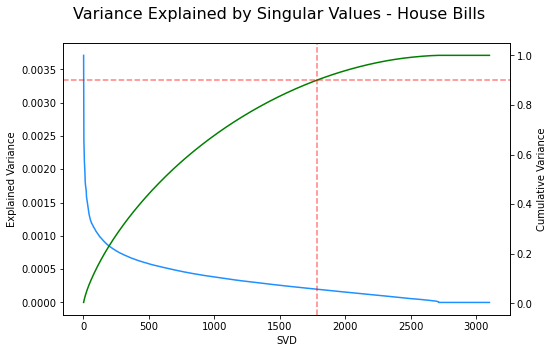

In [74]:
def plot_var_explained(exp_var, cum_exp_var, thresh):
    """Visualize the amount of explained variance per singular value."""
    fig, ax1 = plt.subplots(figsize=(8, 5))
    ax1.plot(list(range(1, exp_var.shape[0]+1)), exp_var, color='dodgerblue')
    ax1.set_ylabel('Explained Variance')
    ax1.set_xlabel('SVD')
    ax2 = ax1.twinx()
    ax2.plot(list(range(1, exp_var.shape[0]+1)), cum_exp_var, color='green')
    ax2.set_ylabel('Cumulative Variance')
    fig = plt.suptitle('Variance Explained by Singular Values '
                       '- House Bills\n', fontsize=16)
    fig = plt.axvline(np.where(exp_var.cumsum() >= thresh)[0][0] + 1,
                      alpha=0.5, color='red', linestyle='--')
    fig = plt.axhline(thresh, alpha=0.5, color='red', linestyle='--')
    return fig

plot_var_explained(exp_var, cum_exp_var, 0.90);

In [75]:
min_svs = np.where(exp_var.cumsum() >= 0.90)[0][0]
min_svs

1783

In [37]:
cum_exp_var[500]

0.4445366582948901

In [76]:
# 4 mins to run

from sklearn.decomposition import TruncatedSVD

min_svs = np.where(exp_var.cumsum() >= 0.90)[0][0]
svd = TruncatedSVD(n_components=min_svs)
tfidf_new = svd.fit_transform(bills_df)

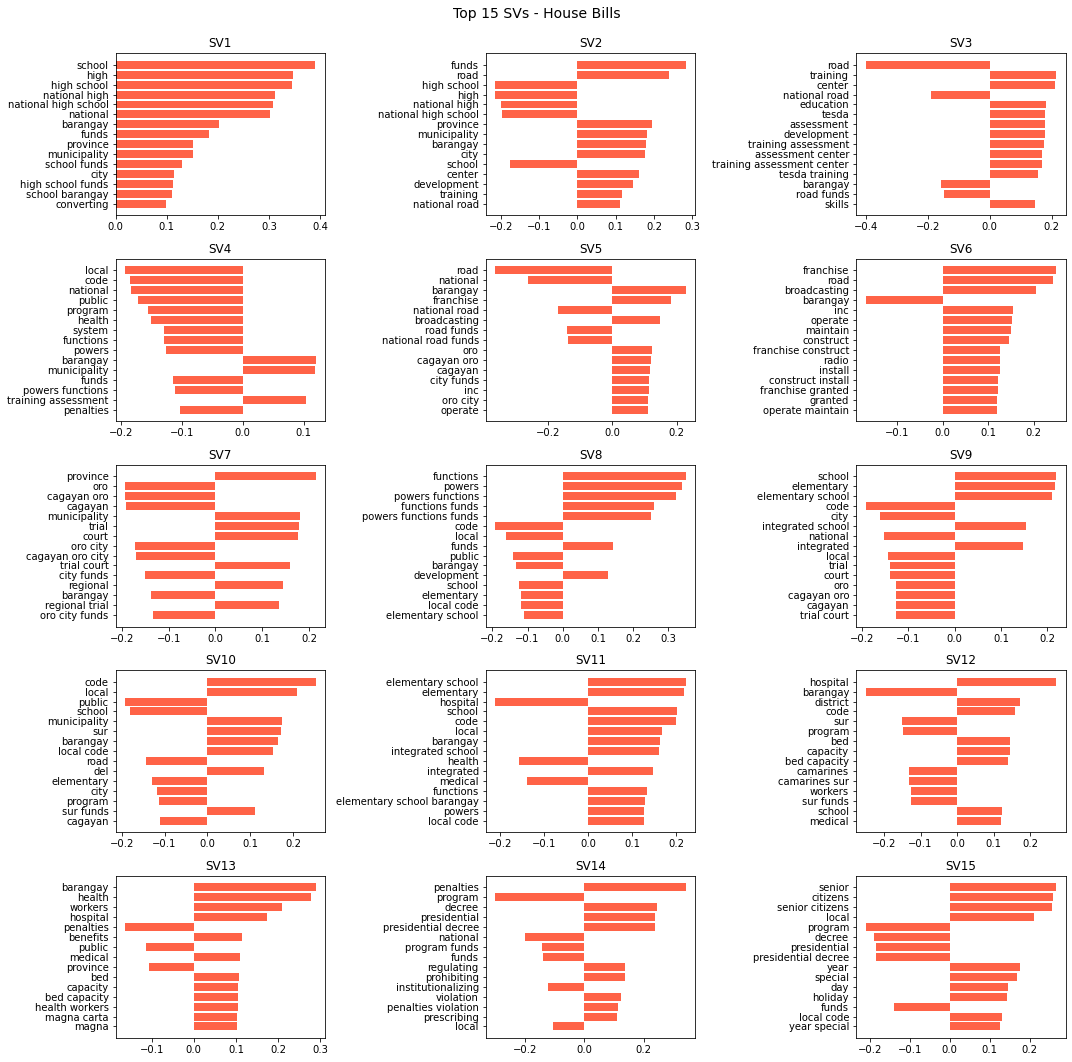

In [77]:
def LSA_plot(p, coefs, color, title):
    """Visualize the Top 15 singular values after latent semantic analysis."""
    fig, ax = plt.subplots(nrows=5, ncols=3, figsize=(15, 15))
    ax = ax.flatten()
    for i in range(15):
        order = np.argsort(np.abs(p[:, i]))[-15:]
        ax[i].barh([coefs[o] for o in order], p[order, i],
                   color=color)
        ax[i].set_title(f'SV{i+1}')
    fig = plt.suptitle(title, fontsize=14)
    fig = plt.tight_layout()
    return fig, ax

p = svd.components_.T
feature_names = bills_df.columns
LSA_plot(p, feature_names, 'tomato', 'Top 15 SVs - House Bills\n');

# Representative Based Clustering

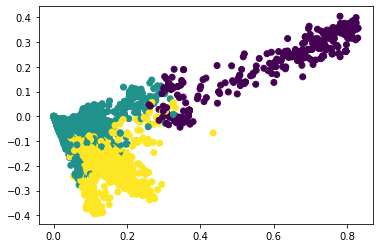

In [145]:
from sklearn.cluster import KMeans
# we tell K-means to partition the points into 5 clusters, which is the number
# of ground-truth clusters
kmeans_bills = KMeans(n_clusters=3, random_state=1337)
y_predict_wine = kmeans_bills.fit_predict(tfidf_new)
plt.scatter(tfidf_new[:,0], tfidf_new[:,1], c=y_predict_wine)
# kmeans_wine_centroids_new = svd.transform(kmeans_bills.cluster_centers_)
# plt.scatter(kmeans_wine_centroids_new[:,0],
#             kmeans_wine_centroids_new[:,1],
#             s=60,
#             c=range(kmeans_wine.n_clusters),
#             marker='s',
#             ec='k',
#             lw=2);

In [146]:
np.bincount(y_predict_wine)

array([ 382, 7490, 2224])

In [78]:
from sklearn.base import clone

def cluster_range(X, clusterer, k_start, k_stop, actual=None):
    ys = []
    centers = []
    inertias = []
    chs = []
    scs = []
#     gss = []
#     gssds = []
    ps = []
    amis = []
    ars = []
    for k in range(k_start, k_stop+1):
        clusterer_k = clone(clusterer)
        clusterer_k.set_params(n_clusters=k, random_state=1337)
        #clusterer_k.(X)
        y = clusterer_k.fit_predict(X)
        ys.append(y)
        centers.append(clusterer_k.cluster_centers_)
        inertias.append(clusterer_k.inertia_)
        chs.append(calinski_harabasz_score(X, y))
        scs.append(silhouette_score(X, y))
#         gs = gap_statistic(X, y, clusterer_k.cluster_centers_,
#                            euclidean, 5,
#                            clone(clusterer).set_params(n_clusters=k),
#                            random_state=1337)
#         gss.append(gs[0])
#         gssds.append(gs[1])

        if actual is not None:
            ps.append(purity(actual, y))
            amis.append(adjusted_mutual_info_score(actual, y))
            ars.append(adjusted_rand_score(actual, y))
    results = {'ys': ys, 'centers': centers, 'inertias': inertias, 'chs': chs,
               'scs': scs}
    if actual is not None:
        results['ps'], results['amis'], results['ars'] = ps, amis, ars
    return results

In [79]:
# 3 mins to run

from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score, silhouette_score

res_bills = cluster_range(tfidf_new, KMeans(), 2, 6, actual=None)

In [80]:
res_bills

{'ys': [array([1, 1, 1, ..., 1, 1, 1], dtype=int32),
  array([0, 0, 0, ..., 0, 0, 0], dtype=int32),
  array([1, 1, 1, ..., 1, 1, 1], dtype=int32),
  array([1, 1, 1, ..., 1, 1, 1], dtype=int32),
  array([1, 1, 1, ..., 1, 5, 5], dtype=int32)],
 'centers': [array([[ 6.03078233e-01, -1.85007135e-01,  3.31324370e-02, ...,
          -7.48891157e-05, -3.96995051e-05,  1.46916204e-04],
         [ 4.97582348e-02,  7.56777036e-02,  7.01205110e-03, ...,
           1.15966861e-05, -9.58823762e-06,  1.40737281e-05]]),
  array([[ 3.35167626e-02,  4.72715644e-02,  1.85350622e-02, ...,
           3.31386029e-05, -6.22994484e-07,  4.97013975e-05],
         [ 7.11527075e-01, -2.55923962e-01,  4.97202954e-02, ...,
           3.57332056e-05, -2.76442576e-04,  2.82855582e-04],
         [ 1.16889610e-01,  1.62737622e-01, -3.08743999e-02, ...,
          -7.64359855e-05, -9.73186439e-06, -1.11198780e-04]]),
  array([[ 9.41576179e-02,  3.31469213e-01,  4.86981920e-01, ...,
           3.88082234e-04,  3.9215031

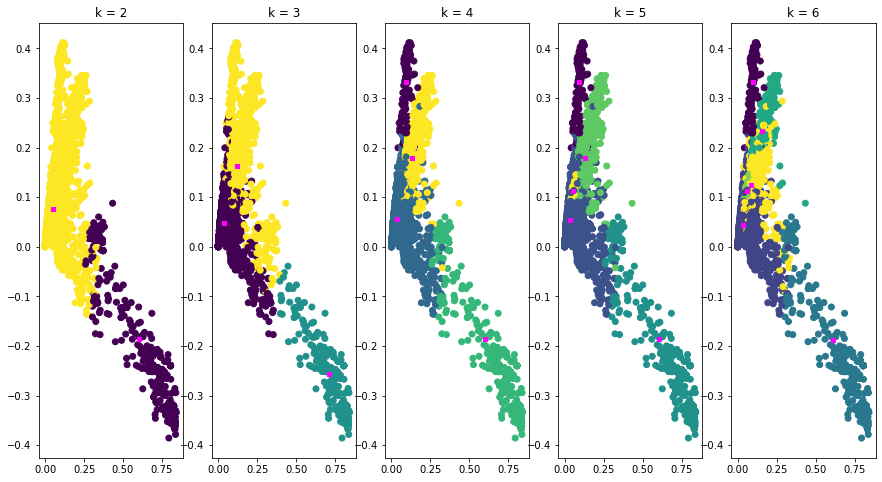

In [81]:
fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(15, 8))
ax = ax.flatten()
for i in range(0, len(res_bills['ys'])):
    ax[i].scatter(tfidf_new[:, 0], tfidf_new[:, 1], c=res_bills['ys'][i])
    ax[i].scatter(res_bills['centers'][i][:, 0], res_bills['centers'][i][:, 1],
                  s=10, marker='s', ec='fuchsia', lw=1, c='fuchsia')
    ax[i].set_title(f'k = {i+2}')
plt.show()

In [89]:
np.bincount(res_bills['ys'][0])

array([ 378, 8764])

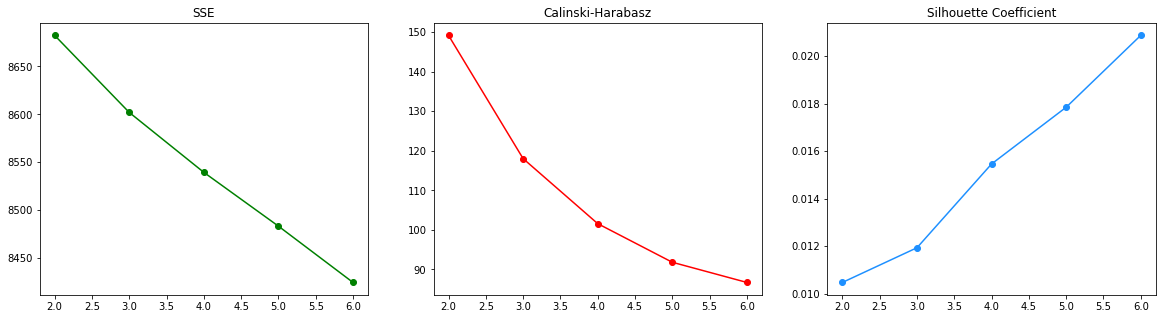

In [91]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))
ax = ax.flatten()
ax[0].plot(list(range(2, 7)), res_bills['inertias'], marker='o', color='green')
ax[0].set_title('SSE')
ax[1].plot(list(range(2, 7)), res_bills['chs'], marker='o', color='red')
ax[1].set_title('Calinski-Harabasz')
ax[2].plot(list(range(2, 7)), res_bills['scs'], marker='o', color='dodgerblue')
ax[2].set_title('Silhouette Coefficient')
plt.show()

In [92]:
df_clusters = df.copy()
df_clusters['label'] = res_bills['ys'][0]
df_clusters

,house_bill_number,title,date_filed,label
0,HB00001,"AN ACT INSTITUTIONALIZING A NATIONAL VALUES, E...",2019-07-01,1
1,HB00002,AN ACT CREATING THE DEPARTMENT OF OVERSEAS FIL...,2019-07-01,1
2,HB00003,AN ACT PROVIDING FOR A NATIONAL PROGRAM TO SUP...,2019-07-01,1
3,HB00004,AN ACT CREATING THE EMERGENCY RESPONSE DEPARTM...,2019-07-01,1
4,HB00005,AN ACT INSTITUTIONALIZING MICROFINANCE PROGRAM...,2019-07-01,1
...,...,...,...,...
10091,HB10105,AN ACT CRIMINALIZING THE USE OF FAKE VACCINATI...,2021-08-30,1
10092,HB10106,AN ACT DEFINING AND CRIMINALIZING VACCINE HOAR...,2021-08-30,1
10093,HB10107,AN ACT PROVIDING FOR THE PROMOTION AND DEVELOP...,2021-08-30,1
10094,HB10108,AN ACT ESTABLISHING A SPECIAL ECONOMIC ZONE IN...,2021-08-30,1


In [93]:
df_clusters_tfidf = bills_df.copy()
df_clusters_tfidf['label'] = res_bills['ys'][0]
df_clusters_tfidf

,abandoned,abolishing,abra,abs-cbn,abs-cbn broadcasting,abs-cbn broadcasting corporation,abs-cbn corporation,abs-cbn corporation abs-cbn,abuse,abuse exploitation,...,zamboanga del,zamboanga del norte,zamboanga del sur,zamboanga sibugay,zone,zone freeport,zone funds,zone funds title,zones,label
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,1
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,1
2,0.359707,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,1
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,1
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9137,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,1
9138,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,1
9139,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,1
9140,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.294411,0.0,0.111003,0.128634,0.0,1


In [97]:
df_clusters_tfidf[df_clusters_tfidf['label'] == 0].sum(axis=0).sort_values(ascending=False)[1:50]

high school                        91.848853
high                               91.506098
national high                      82.148952
national high school               80.839330
national                           53.575014
school funds                       41.342960
school barangay                    36.559717
barangay                           32.330251
high school funds                  30.094353
elementary school                  27.117894
elementary                         25.392653
high school barangay               24.998783
municipality                       22.756508
funds                              21.739292
integrated school                  21.566157
province                           21.341601
integrated                         19.622300
converting                         18.295893
elementary school barangay         16.493457
city                               13.070800
converting independent             12.126233
independent                        11.956331
separating

In [96]:
df_clusters_tfidf[df_clusters_tfidf['label'] == 1].sum(axis=0).sort_values(ascending=False)[1:50]

funds                 292.138271
national              184.439609
province              175.791106
barangay              159.750313
city                  145.740795
municipality          144.627258
public                126.883135
development           122.637538
road                  116.149367
program               110.123975
health                101.196960
code                  100.854192
local                  97.169708
education              96.956117
center                 93.269289
system                 90.721165
penalties              90.518124
title                  88.668844
mandating              87.000284
institutionalizing     71.032803
district               70.054717
service                69.969181
strengthening          69.046809
workers                67.738425
protection             66.687717
hospital               66.483655
use                    64.346000
functions              63.150265
powers                 62.025713
department             61.821654
sur       

In [165]:
df_clusters[df_clusters['label'] == 1]['title'].to_list()

['AN ACT INSTITUTIONALIZING A NATIONAL VALUES, ETIQUETTE, AND MORAL UPRIGHTNESS PROGRAM',
 'AN ACT CREATING THE DEPARTMENT OF OVERSEAS FILIPINO WORKERS (OFW) AND FOREIGN EMPLOYMENT, DEFINING ITS POWERS AND FUNCTIONS, APPROPRIATING FUNDS THEREFOR, RATIONALIZING THE ORGANIZATION AND FUNCTIONS OF GOVERNMENT AGENCIES RELATED TO MIGRATION, AND FOR OTHER PURPOSES',
 'AN ACT PROVIDING FOR A NATIONAL PROGRAM TO SUPPORT AND CARE FOR THE ABANDONED, NEGLECTED, AND VOLUNTARY COMMITTED CHILDREN, CREATING A SPECIAL TRUST FUND, AND FOR OTHER PURPOSES',
 'AN ACT CREATING THE EMERGENCY RESPONSE DEPARTMENT (ERD), APPROPRIATING FUNDS THEREFOR, AND FOR OTHER PURPOSES',
 'AN ACT INSTITUTIONALIZING MICROFINANCE PROGRAMS AND ACCESS TO CAPITAL TO SUPPORT AND GROW MICRO, SMALL, AND MEDIUM ENTERPRISES (MSMEs), ALLOCATING FUNDS THEREFOR, AND FOR OTHER PURPOSES',
 'AN ACT PROVIDING FOR ADDITIONAL SUPPORT AND COMPENSATION FOR EDUCATORS IN BASIC EDUCATION',
 'AN ACT CREATING A DEPARTMENT OF FISHERIES AND AQUATIC RE

In [161]:
df_clusters[df_clusters['label'] == 0]

,house_bill_number,title,significance,date_filed,principal_authors,date_read,primary_referral,mother_bill_status,status,label
302,HB00303,AN ACT ESTABLISHING A PHILIPPINE HIGH SCHOOL F...,NATIONAL,2019-07-01,"YAP, VICTOR A.",2019-07-23,BASIC EDUCATION AND CULTURE,Republic Act RA11470 enacted on 2020-06-09,Substituted by HB06312,0
544,HB00545,AN ACT ESTABLISHING A PHILIPPINE HIGH SCHOOL F...,NATIONAL,2019-07-01,"ENVERGA, WILFRIDO MARK M.",2019-07-23,BASIC EDUCATION AND CULTURE,Republic Act RA11470 enacted on 2020-06-09,Substituted by HB06312,0
584,HB00585,AN ACT SEPARATING TABUK CITY NATIONAL HIGH SCH...,LOCAL,2019-07-01,"MANGAOANG, ALLEN JESSE C.",2019-07-23,BASIC EDUCATION AND CULTURE,Republic Act RA11527 enacted on 2021-03-12,Substituted by HB05740,0
585,HB00586,AN ACT SEPARATING THE BALBALAN AGRICULTURAL AN...,LOCAL,2019-07-01,"MANGAOANG, ALLEN JESSE C.; ROMULO, ROMAN T.; Y...",2019-07-23,BASIC EDUCATION AND CULTURE,NaN,"Approved by the House on 2021-06-02, transmitt...",0
630,HB00633,AN ACT CREATING A HIGH SCHOOL FOR THE ARTS IN ...,LOCAL,2019-07-01,"LEGARDA, LOREN",2019-07-23,BASIC EDUCATION AND CULTURE,NaN,Pending with the Committee on BASIC EDUCATION ...,0
...,...,...,...,...,...,...,...,...,...,...
9645,HB09659,AN ACT\r\nSEPARATING THE CELESTINO G. TABUENA ...,LOCAL,2021-06-30,"ESCUDERO, EVELINA G.; ROMULO, ROMAN T.; YAP, E...",2021-07-28,BASIC EDUCATION AND CULTURE,NaN,"Approved by the House on 2021-08-25, transmitt...",0
9646,HB09660,AN ACT\r\nSEPARATING THE LYDIA D. MARTINEZ MEM...,LOCAL,2021-06-30,"ESCUDERO, EVELINA G.; ROMULO, ROMAN T.; YAP, E...",2021-07-28,BASIC EDUCATION AND CULTURE,NaN,"Approved by the House on 2021-08-25, transmitt...",0
9717,HB09731,AN ACT \r\nESTABLISHING THE PHILIPPINE HIGH SC...,NATIONAL,2021-07-01,"ROMULO, ROMAN T.; GARCIA, JOSE ENRIQUE ""JOET"" ...",2021-07-28,BASIC EDUCATION AND CULTURE,NaN,Approved on Third Reading on 2021-08-24,0
9796,HB09810,AN ACT CONVERTING THE MALATGAO NATIONAL HIGH S...,NATIONAL,2021-07-08,"ABUEG-ZALDIVAR, CYRILLE ""BENG"" F.",2021-08-02,BASIC EDUCATION AND CULTURE,NaN,Pending with the Committee on BASIC EDUCATION ...,0


In [46]:
df_clusters[df_clusters['label'] == 0]['title'].to_list()

NameError: name 'df_clusters' is not defined

In [174]:
# cluster 0 is more on local education/public high schools

df_clusters_tfidf[df_clusters_tfidf['label'] == 0].sum(axis=0).sort_values(ascending=False)[1:50]

high school                        94.468581
high                               93.760701
national high                      82.961515
national high school               81.648639
national                           53.069661
school funds                       41.501868
school barangay                    37.045453
barangay                           32.404406
high school funds                  30.532345
elementary school                  26.415311
high school barangay               25.349903
elementary                         24.566993
municipality                       23.055943
funds                              21.890450
province                           21.715346
integrated school                  21.092690
integrated                         19.117650
converting                         18.175995
elementary school barangay         16.578149
city                               13.306066
converting independent             12.183682
separating                         11.825552
independen

In [164]:
# cluster 2: economic zones/construction/BBB stuff

list(df_clusters[df_clusters['label'] == 2]['title'].values)

['AN ACT PROVIDING FOR THE CONSTRUCTION OF SKYWAY OVERPASSES OVER AND TUNNEL UNDERPASSES UNDER THE THREE (3) MOST CONGESTED ROAD SECTIONS IN THE FIRST DISTRICT OF THE CITY OF CEBU AND APPROPRIATING FUNDS THEREFOR',
 'AN ACT PROVIDING FOR THE CONSTRUCTION OF A BRIDGE FROM CEBU CITY TO THE MUNICIPALITY OF CORDOVA, PROVINCE OF CEBU AND A COASTAL ROAD/EXPRESSWAY TO THE MACTAN–CEBU INTERNATIONAL AIRPORT, LAPU-LAPU CITY, AS WELL AS A BRIDGE FROM THE MUNICIPALITY OF CONSOLACION, PROVINCE OF CEBU TO THE MACTAN–CEBU INTERNATIONAL AIRPORT, LAPU-LAPU CITY AND APPROPRIATING FUNDS THEREFOR',
 'AN ACT PROVIDING FOR THE CONSTRUCTION OF A COASTAL ROAD TRAVERSING THE CITIES OF BACOLOD, SILAY, TALISAY AND VICTORIAS, AND THE MUNICIPALITY OF ENRIQUE B. MAGALONA IN THE PROVINCE OF NEGROS OCCIDENTAL',
 'AN ACT POSTPONING THE MAY 2020 BARANGAY AND SANGGUNIANG KABATAAN ELECTIONS, AMENDING FOR THE PURPOSE REPUBLIC ACT NO. 9164, AS AMENDED, AND FOR OTHER PURPOSES',
 'AN ACT DECLARING AS AGRICULTURAL LAND CERTAI

In [175]:
# cluster 2: economic zones/construction/BBB stuff

df_clusters_tfidf[df_clusters_tfidf['label'] == 2].sum(axis=0).sort_values(ascending=False)[1:50]

province                      156.794608
municipality                  142.334166
barangay                      131.614118
city                          127.036310
funds                         122.344326
road                          104.723005
center                         69.920900
district                       64.906742
sur                            59.254137
converting                     56.683192
del                            54.439124
hospital                       53.537829
national road                  49.681570
san                            46.774163
cagayan                        41.836195
national                       41.517865
road funds                     38.591877
oro                            38.517684
title                          38.458190
norte                          38.073277
city funds                     37.902455
cagayan oro                    37.811868
ecotourism                     37.763795
library                        36.903343
national road fu

# Agglomerative-Based Clustering

In [98]:
from scipy.cluster.hierarchy import linkage, dendrogram

Z = linkage(tfidf_new, method='ward')

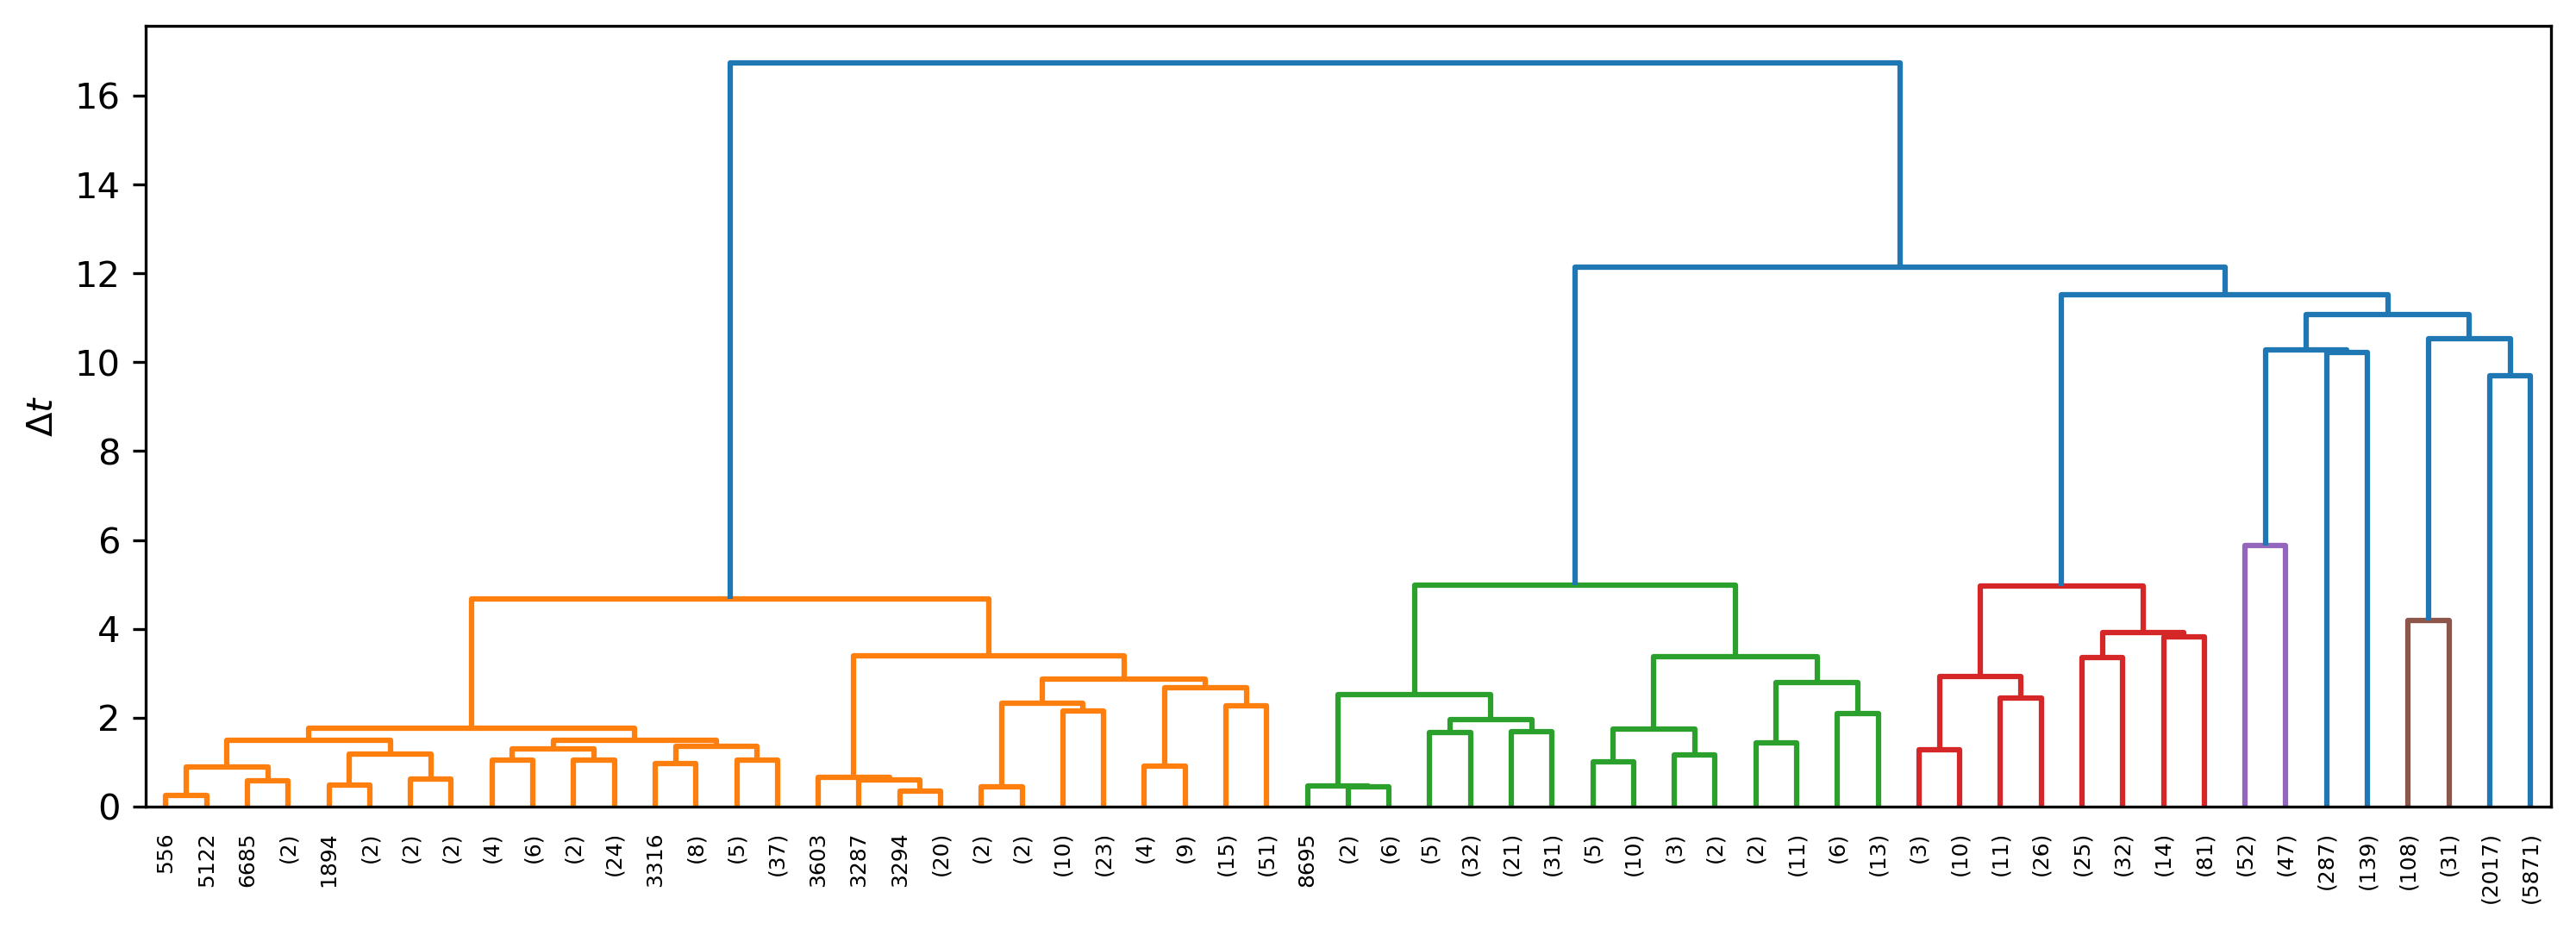

In [115]:
# color_threshold=11

fig, ax = plt.subplots(figsize=(12, 4), dpi=300)
dn = dendrogram(Z, truncate_mode='level', color_threshold=8, p=5, ax=ax)
ax.set_ylabel(r'$\Delta t$');

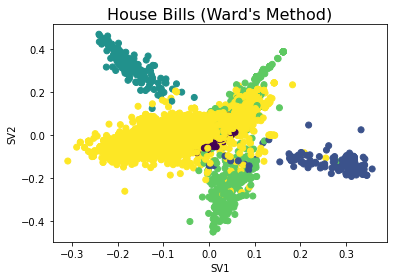

In [107]:
from scipy.cluster.hierarchy import fcluster

y_predict_bills = fcluster(Z, t=11, criterion='distance')
plt.scatter(tfidf_new[:, 3], tfidf_new[:, 4], c=y_predict_bills)
plt.xlabel('SV1')
plt.ylabel('SV2')
plt.title('House Bills (Ward\'s Method)', fontsize=16)
plt.show()

In [116]:
# summary statistics

y_predict_bills = fcluster(Z, t=9, criterion='distance')
cluster_results = pd.DataFrame({'cluster': np.unique(y_predict_bills),
                                'num_elements': np.bincount(y_predict_bills)[1:]})
cluster_results

,cluster,num_elements
0,1,238
1,2,150
2,3,202
3,4,99
4,5,287
5,6,139
6,7,139
7,8,2017
8,9,78
9,10,5793


In [118]:
df['cluster_labels'] = y_predict_bills
df

,house_bill_number,title,date_filed,cluster_labels
0,HB00001,"AN ACT INSTITUTIONALIZING A NATIONAL VALUES, E...",2019-07-01,10
1,HB00002,AN ACT CREATING THE DEPARTMENT OF OVERSEAS FIL...,2019-07-01,10
2,HB00003,AN ACT PROVIDING FOR A NATIONAL PROGRAM TO SUP...,2019-07-01,10
3,HB00004,AN ACT CREATING THE EMERGENCY RESPONSE DEPARTM...,2019-07-01,10
4,HB00005,AN ACT INSTITUTIONALIZING MICROFINANCE PROGRAM...,2019-07-01,10
...,...,...,...,...
10091,HB10105,AN ACT CRIMINALIZING THE USE OF FAKE VACCINATI...,2021-08-30,10
10092,HB10106,AN ACT DEFINING AND CRIMINALIZING VACCINE HOAR...,2021-08-30,10
10093,HB10107,AN ACT PROVIDING FOR THE PROMOTION AND DEVELOP...,2021-08-30,10
10094,HB10108,AN ACT ESTABLISHING A SPECIAL ECONOMIC ZONE IN...,2021-08-30,8


In [120]:
df[df['cluster_labels'] == 8]['title'].to_list()

['AN ACT RENAMING THE MACTAN-CEBU INTERNATIONAL AIRPORT AUTHORITY TO LAPU-LAPU - CEBU INTERNATIONAL AIRPORT AUTHORITY AND MACTAN-CEBU INTERNATIONAL AIRPORT TO LAPU-LAPU - CEBU INTERNATIONAL AIRPORT',
 'AN ACT PROVIDING FOR THE ESTABLISHMENT AND CONSTRUCTION OF A SECOND RUNWAY AT THE MACTAN-CEBU INTERNATIONAL AIRPORT (MCIA) WITH ITS CONCOMITANT ACCESS TAXIWAYS AND RAPID EXIT TAXIWAYS (RET), RUNWAY LIGHTING SYSTEMS, AND NAVIGATIONAL/LANDING EQUIPMENT, AND APPROPRIATING FUNDS THEREFOR',
 'AN ACT PROVIDING FOR THE CONSTRUCTION OF A BRIDGE FROM CEBU CITY TO THE MUNICIPALITY OF CORDOVA, PROVINCE OF CEBU AND A COASTAL ROAD/EXPRESSWAY TO THE MACTAN–CEBU INTERNATIONAL AIRPORT, LAPU-LAPU CITY, AS WELL AS A BRIDGE FROM THE MUNICIPALITY OF CONSOLACION, PROVINCE OF CEBU TO THE MACTAN–CEBU INTERNATIONAL AIRPORT, LAPU-LAPU CITY AND APPROPRIATING FUNDS THEREFOR',
 'AN ACT ESTABLISHING THE DEPARTMENT OF CULTURE, APPROPRIATING FUNDS THEREFOR, AND FOR OTHER PURPOSES',
 "AN ACT PROVIDING SECURITY OF TENUR

In [135]:
df_clusters_tfidf = bills_df.copy()
df_clusters_tfidf['cluster_label'] = y_predict_bills
#df_clusters_tfidf


df_clusters_tfidf[df_clusters_tfidf['cluster_label'] == 9].sum(axis=0).sort_values(ascending=False)[1:50]

revenue code                  19.353392
internal revenue code         19.353392
national internal             19.292495
national internal revenue     19.292495
internal revenue              18.967337
revenue                       18.762077
internal                      18.663888
code                          12.913604
sections                      10.060550
national                       9.634755
tax                            9.269225
sections national internal     8.322044
sections national              8.281434
value-added tax                4.355106
value-added                    4.325284
income                         4.047319
adding                         3.382782
exempting                      3.241914
taxes                          2.316507
new                            1.821188
sale                           1.783671
income tax                     1.748147
products                       1.718436
imposing                       1.709567
repealing                      1.619834


# Pre-pandemic vs Pandemic Situation

In [17]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram

def get_distances(X,model,mode='l2'):
    distances = []
    weights = []
    children=model.children_
    dims = (X.shape[1],1)
    distCache = {}
    weightCache = {}
    for childs in children:
        c1 = X[childs[0]].reshape(dims)
        c2 = X[childs[1]].reshape(dims)
        c1Dist = 0
        c1W = 1
        c2Dist = 0
        c2W = 1
        if childs[0] in distCache.keys():
            c1Dist = distCache[childs[0]]
            c1W = weightCache[childs[0]]
        if childs[1] in distCache.keys():
            c2Dist = distCache[childs[1]]
            c2W = weightCache[childs[1]]
        d = np.linalg.norm(c1-c2)
        cc = ((c1W*c1)+(c2W*c2))/(c1W+c2W)

        X = np.vstack((X,cc.T))

        newChild_id = X.shape[0]-1

        # How to deal with a higher level cluster merge with lower distance:
        if mode=='l2':  # Increase the higher level cluster size suing an l2 norm
            added_dist = (c1Dist**2+c2Dist**2)**0.5 
            dNew = (d**2 + added_dist**2)**0.5
        elif mode == 'max':  # If the previrous clusters had higher distance, use that one
            dNew = max(d,c1Dist,c2Dist)
        elif mode == 'actual':  # Plot the actual distance.
            dNew = d


        wNew = (c1W + c2W)
        distCache[newChild_id] = dNew
        weightCache[newChild_id] = wNew

        distances.append(dNew)
        weights.append(wNew)
    return distances, weights

model = AgglomerativeClustering(n_clusters=2,linkage="ward")
model.fit(tfidf_new[:, :2])

distance, weight = get_distances(tfidf_new[:, :2], model)
linkage_matrix = np.column_stack([model.children_, 
                                  distance, weight]).astype(float)
plt.figure(figsize=(20,10))
dendrogram(linkage_matrix)
plt.show()

KeyboardInterrupt: 

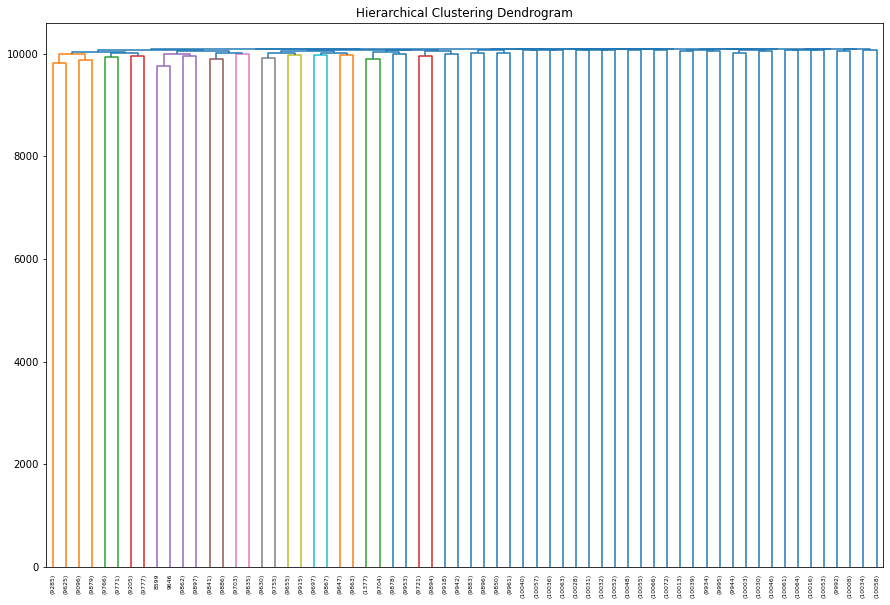

In [29]:
import numpy as np

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering

def plot_dendrogram(model, **kwargs):

    # Children of hierarchical clustering
    children = model.children_

    # Distances between each pair of children
    # Since we don't have this information, we can use a uniform one for plotting
    distance = np.arange(children.shape[0])

    # The number of observations contained in each cluster level
    no_of_observations = np.arange(2, children.shape[0]+2)

    # Create linkage matrix and then plot the dendrogram
    linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


# iris = load_iris()
# x = iris.data
model = AgglomerativeClustering(n_clusters=4)
model = model.fit(tfidf_new[:, :2])
plt.figure(figsize=(15,10))
plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(model, truncate_mode='level', color_threshold=10000, p=5)
plt.show()

In [22]:
len(iris.data)

150